In [3]:
import duckdb
import pandas as pd

In [9]:
# relative path to duckdb file
con = duckdb.connect('../repos.db')

In [11]:
# get the results as csv
query = """
    SELECT *
    FROM repos.fact_stars_monthly as s
    JOIN repos.dim_repos as r
    ON s.repo_id = r.repo_id
    AND end_date is null
    """
df_monthly_stars = con.sql(query).df()
df_monthly_stars.to_csv('monthly_stars.csv')

In [8]:
# close the connection
con.close()

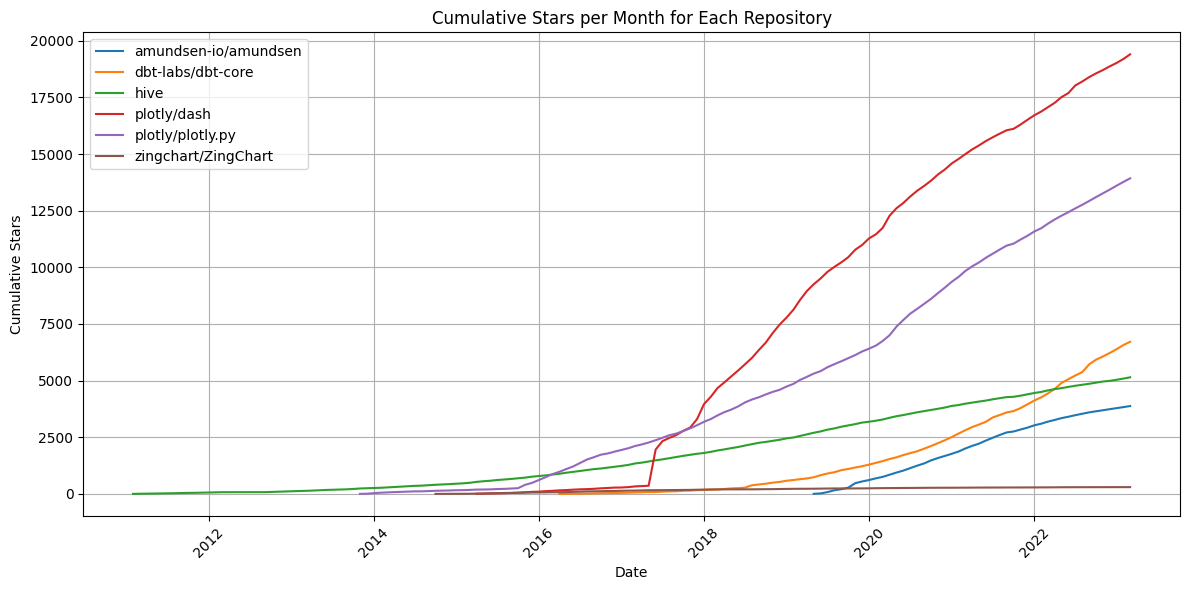

In [13]:
# plot chart of cumulative stars per month for each repo
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('monthly_stars.csv')

# convert date_month to datetime
df['date_month'] = pd.to_datetime(df['date_month'])

# sort the df by repo_name and date_month
df = df.sort_values(['repo_name', 'date_month'])

# calculate cumulative sum of stars for each repo
df['cumulative_stars'] = df.groupby('repo_name')['count_stars'].cumsum()

# create the plot
plt.figure(figsize=(12, 6))

for repo in df['repo_name'].unique():
    repo_data = df[df['repo_name'] == repo]
    plt.plot(repo_data['date_month'], repo_data['cumulative_stars'], label=repo)

plt.title('Cumulative Stars per Month for Each Repository')
plt.xlabel('Date')
plt.ylabel('Cumulative Stars')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()